## Несбалансированные классификации


In [2]:
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

In [5]:
data = pd.read_csv("")

FileNotFoundError: [Errno 2] No such file or directory: 'travel_insurance_preprocessed.csv'

In [6]:
data.head()

,Claim,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE,Gender_M,Gender_None
0,0,-0.362710,0.087685,0.301743,-0.068243,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.003984,-0.386840,-0.497090,-0.282109,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1.943603,0.809788,-0.497090,-0.282109,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,-0.420609,-1.047048,-0.497090,-0.282109,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,-0.430259,0.087685,0.301743,-0.424687,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print(f1_score(target_valid, predicted_valid))

0.08698830409356725


In [37]:
target_zeros = target_train[target_train==0]
target_ones = target_train[target_train==1]

In [40]:
features_ones = features_train[target_train==1]
features_zeros = features_train[target_train==0]

In [38]:
target_zeros.shape

(37411,)

In [41]:
features_ones.shape

(584, 196)

In [42]:
features_zeros.shape

(37411, 196)

In [43]:
target_ones.shape

(584,)

In [52]:
repeat = 10 
features_upsampled = pd.concat([features_zeros]+[features_ones] * repeat)
target_upsampled = pd.concat([target_zeros]+[target_ones]*repeat)

In [53]:
features_upsampled.shape

(43251, 196)

In [54]:
target_upsampled.shape

(43251,)

In [58]:
shuffle(features_upsampled)


,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Travel Agency,Distribution Channel_Online,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan,Destination_ANGOLA,Destination_ARGENTINA,Destination_ARMENIA,Destination_AUSTRALIA,Destination_AUSTRIA,Destination_AZERBAIJAN,Destination_BAHRAIN,Destination_BANGLADESH,Destination_BARBADOS,Destination_BELARUS,Destination_BELGIUM,Destination_BENIN,Destination_BERMUDA,Destination_BHUTAN,...,Destination_NETHERLANDS,Destination_NEW CALEDONIA,Destination_NEW ZEALAND,Destination_NIGERIA,Destination_NORTHERN MARIANA ISLANDS,Destination_NORWAY,Destination_OMAN,Destination_PAKISTAN,Destination_PANAMA,Destination_PAPUA NEW GUINEA,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_PUERTO RICO,Destination_QATAR,Destination_REPUBLIC OF MONTENEGRO,Destination_REUNION,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_RWANDA,Destination_SAMOA,Destination_SAUDI ARABIA,Destination_SENEGAL,Destination_SERBIA,Destination_SEYCHELLES,Destination_SIERRA LEONE,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOLOMON ISLANDS,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_TAJIKISTAN,"Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TIBET,Destination_TRINIDAD AND TOBAGO,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_TURKS AND CAICOS ISLANDS,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE,Gender_M,Gender_None
42694,-0.468859,-0.469366,-0.177557,-0.781130,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3361,0.718073,-0.180525,-0.497090,-0.282109,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
33164,-0.266212,2.522203,1.569731,-0.353398,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
22501,-0.372360,-0.149578,-0.072060,2.284282,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49678,-0.082865,-0.366208,-0.497090,-0.7

In [60]:
shuffle(target_upsampled)

8241     0
15708    0
4734     0
38936    0
8314     0
        ..
4483     0
45108    0
29065    0
50398    0
36515    0
Name: Claim, Length: 43251, dtype: int64

# Увеличение выборки

In [63]:
def upsample(features,target,repeat):
    target_zeros = target[target==0]
    target_ones = target[target==1]
    features_ones = features[target==1]
    features_zeros = features[target==0]
    features_upsampled = pd.concat([features_zeros]+[features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros]+[target_ones]*repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [64]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

In [65]:
features_upsampled

,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Travel Agency,Distribution Channel_Online,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan,Destination_ANGOLA,Destination_ARGENTINA,Destination_ARMENIA,Destination_AUSTRALIA,Destination_AUSTRIA,Destination_AZERBAIJAN,Destination_BAHRAIN,Destination_BANGLADESH,Destination_BARBADOS,Destination_BELARUS,Destination_BELGIUM,Destination_BENIN,Destination_BERMUDA,Destination_BHUTAN,...,Destination_NETHERLANDS,Destination_NEW CALEDONIA,Destination_NEW ZEALAND,Destination_NIGERIA,Destination_NORTHERN MARIANA ISLANDS,Destination_NORWAY,Destination_OMAN,Destination_PAKISTAN,Destination_PANAMA,Destination_PAPUA NEW GUINEA,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_PUERTO RICO,Destination_QATAR,Destination_REPUBLIC OF MONTENEGRO,Destination_REUNION,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_RWANDA,Destination_SAMOA,Destination_SAUDI ARABIA,Destination_SENEGAL,Destination_SERBIA,Destination_SEYCHELLES,Destination_SIERRA LEONE,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOLOMON ISLANDS,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_TAJIKISTAN,"Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TIBET,Destination_TRINIDAD AND TOBAGO,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_TURKS AND CAICOS ISLANDS,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE,Gender_M,Gender_None
36874,-0.131114,-0.036104,-0.002574,-0.567264,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
34681,-0.102164,-0.469366,-0.177557,0.288200,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
15621,-0.333761,-0.428103,-0.497090,-0.282109,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
46514,0.158381,4.110829,4.371985,5.563559,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3174,-0.266212,-0.227977,0.406732,-0.353

In [66]:
target_upsampled

36874    0
34681    1
15621    1
46514    0
3174     1
        ..
19663    0
40174    0
18323    0
1861     0
659      0
Name: Claim, Length: 43251, dtype: int64

In [68]:
model = LogisticRegression(solver="liblinear")
model.fit(features_upsampled, target_upsampled)
prediction1 = model.predict(features_valid)
f1 = f1_score(target_valid, prediction1)
print(f1)

0.13688212927756654


# Уменьшение выборки

In [76]:
def downsample(features,target,fraction):
    target_zeros = target[target==0]
    target_ones = target[target==1]
    features_ones = features[target==1]
    features_zeros = features[target==0]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state = 12345)]+[features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state = 12345)]+[target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled,target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [78]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)
print(features_downsampled.shape)
print(target_downsampled.shape)

(4325, 196)
(4325,)


In [15]:
model = LogisticRegression(solver="liblinear")
model.fit(features_downsampled, target_downsampled)
prediction2 = model.predict(features_valid)
f1 = f1_score(target_valid, prediction2)
print(f1)

NameError: name 'features_downsampled' is not defined

### изменения порога. 

In [3]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)  #вероятность классов (1 столбец - вероятность отрицательного класса, 2 столбец - положительного)
probabilities_one_valid = probabilities_valid[:,1]
print(probabilities_one_valid)

NameError: name 'features_train' is not defined

In [9]:
probabilities_valid

array([[0.98143716, 0.01856284],
       [0.9904725 , 0.0095275 ],
       [0.9957981 , 0.0042019 ],
       ...,
       [0.99297387, 0.00702613],
       [0.99039796, 0.00960204],
       [0.94990446, 0.05009554]])

In [6]:
target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
features, target, test_size=0.25, random_state=12345)
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for i in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid>i
    precision = precision_score(target_valid,predicted_valid)
    recall = recall_score(target_valid,predicted_valid)
    if (precision+recall) !=0:
        f1 = 2 * recall * precision /(precision+recall)
        print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f},  f1 = {:.3f}".format(i, precision, recall, f1))
    else:
        break

Порог = 0.00 | Точность = 0.013, Полнота = 1.000,  f1 = 0.026
Порог = 0.02 | Точность = 0.052, Полнота = 0.645,  f1 = 0.096
Порог = 0.04 | Точность = 0.061, Полнота = 0.609,  f1 = 0.110
Порог = 0.06 | Точность = 0.072, Полнота = 0.367,  f1 = 0.121
Порог = 0.08 | Точность = 0.097, Полнота = 0.254,  f1 = 0.140
Порог = 0.10 | Точность = 0.112, Полнота = 0.178,  f1 = 0.137
Порог = 0.12 | Точность = 0.146, Полнота = 0.107,  f1 = 0.123
Порог = 0.14 | Точность = 0.033, Полнота = 0.012,  f1 = 0.017
Порог = 0.16 | Точность = 0.036, Полнота = 0.006,  f1 = 0.010


# PR-кривая
## по вертикали точность, по горизонтали полнота. Чем выше кривая, тем лучше модель

Когда положительных объектов нет, точность не вычислить. Выберем другие характеристики, в которых нет деления на ноль.
Прежде чем перейти к новой кривой, дадим несколько важных определений.
Как измерить, насколько правильно классификатор находит объекты? Долей верно предсказанных объектов к общему числу объектов класса. Это отношение называется TPR. TPR (англ. True Positive Rate) или «полнота», а на английском используют термин recall. Формула выглядит так, где P=TP+FN P=TP+FN
Доля ложных срабатываний к общему числу объектов за пределами класса (англ. False Positive Rate, FPR) вычисляется аналогично. Это отношение FP-ответов (англ. False Positives — отрицательные, классифицированные как положительные) к сумме отрицательных ответов: FP FP и TN TN (англ. True Negatives — верно классифицированные отрицательные ответы). Ниже дана формула, где N=FP+TN

# ROC-кривая

Мы стали свидетелями нового противостояния — TPR против FPR. Изобразим его на графике.
По горизонтали нанесём долю ложноположительных ответов (FPR), а по вертикали — долю истинно положительных ответов (TPR). Переберём значения порога логистической регрессии и проведём кривую.
Она называется ROC-кривая, или кривая ошибок (от англ. receiver operating characteristic, «характеристика работы приёмника»; термин пришёл из теории обработки сигналов).
Для модели, которая всегда отвечает случайно, ROC-кривая выглядит как прямая, идущая из левого нижнего угла в верхний правый. Чем график выше, тем больше значение TPR и лучше качество модели.

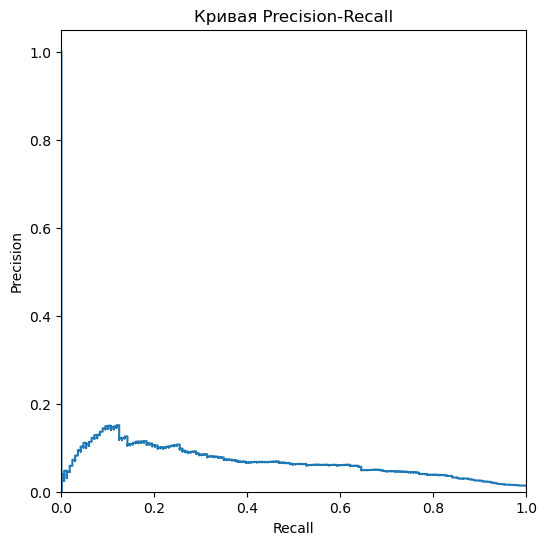

In [91]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

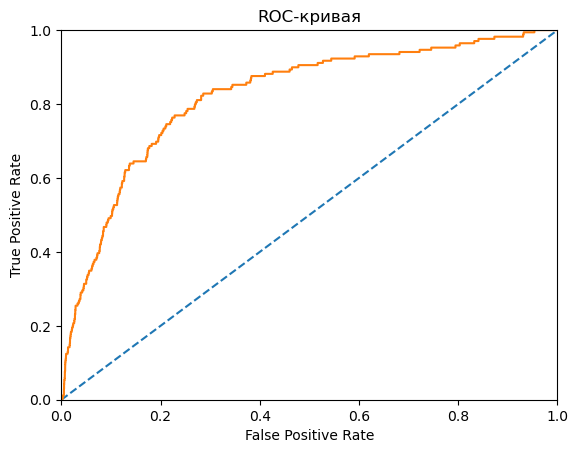

In [31]:
fpr,tpr,thresholds = roc_curve(target_valid, probabilities_valid[:, 1])
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [34]:
roc_auc = roc_auc_score(target_valid, probabilities_valid[:, 1])
print(roc_auc)

0.8222725946859208


In [6]:
jupyter labextension install @lckr/jupyterlab_variablehinter

SyntaxError: invalid syntax (1792574577.py, line 1)

In [1]:
pip install jupyterlab-lsp python-lsp-server[all]

INFO: pip is looking at multiple versions of flake8 to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.6 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.4 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip uninstall jupyterlab-lsp python-lsp-server
jupyter lab clean
jupyter lab build

SyntaxError: invalid syntax (2501768824.py, line 1)

In [2]:
pip install --upgrade ipython jedi

   ---------------------------------------- 0.0/611.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/611.0 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/611.0 kB ? eta -:--:--
   ---------------------------------------- 611.0/611.0 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 9.2.0
    Uninstalling ipython-9.2.0:
      Successfully uninstalled ipython-9.2.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pd.to_Series